# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dryden
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | arish
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | pionerskiy
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | sangamner
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | tidjikja
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | mareeba
Processing Record 15 of Set 1 | chania
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | habo
Processing Record 18 of Set 1 | cumana
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | mata-utu
Processing Record 22 of Set 1 | klyuchi
Processing Record 23 of Set 1 | tazovsky
Proc

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dryden,49.7833,-92.7503,17.16,63,100,4.12,CA,2023-07-15
1,Puerto Ayora,-0.7393,-90.3518,29.98,92,41,3.13,EC,2023-07-15
2,Arish,31.1316,33.7984,27.24,75,0,2.11,EG,2023-07-15
3,Ushuaia,-54.8000,-68.3000,1.81,69,40,10.80,AR,2023-07-15
4,Pionerskiy,54.9508,20.2275,20.97,57,98,6.67,RU,2023-07-15


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Dryden,49.7833,-92.7503,17.16,63,100,4.12,CA,2023-07-15
1,Puerto Ayora,-0.7393,-90.3518,29.98,92,41,3.13,EC,2023-07-15
2,Arish,31.1316,33.7984,27.24,75,0,2.11,EG,2023-07-15
3,Ushuaia,-54.8000,-68.3000,1.81,69,40,10.80,AR,2023-07-15
4,Pionerskiy,54.9508,20.2275,20.97,57,98,6.67,RU,2023-07-15


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

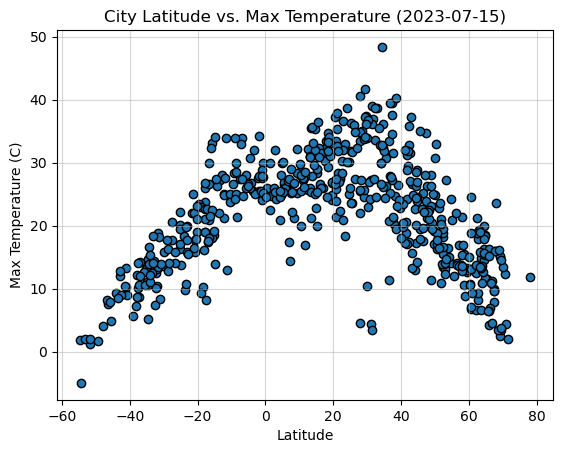

In [36]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

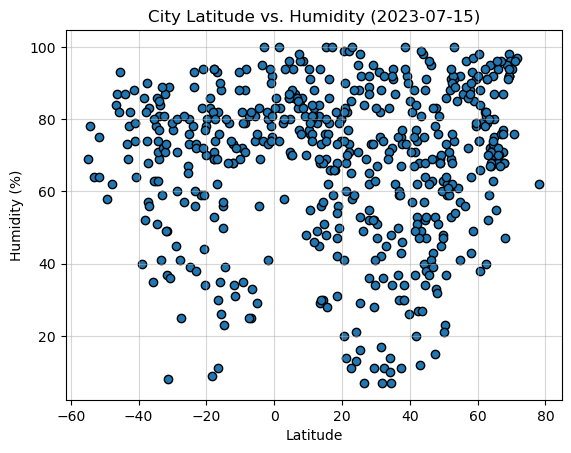

In [37]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

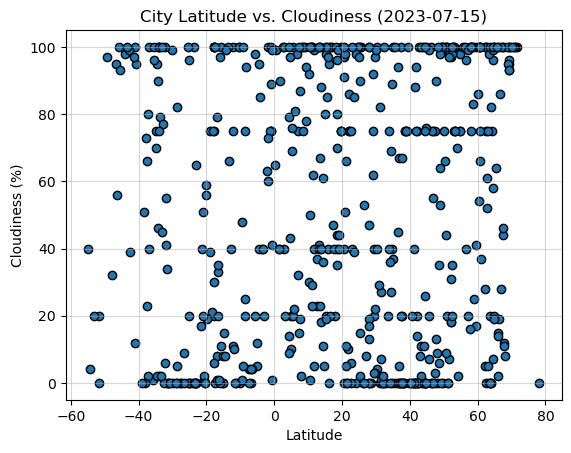

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

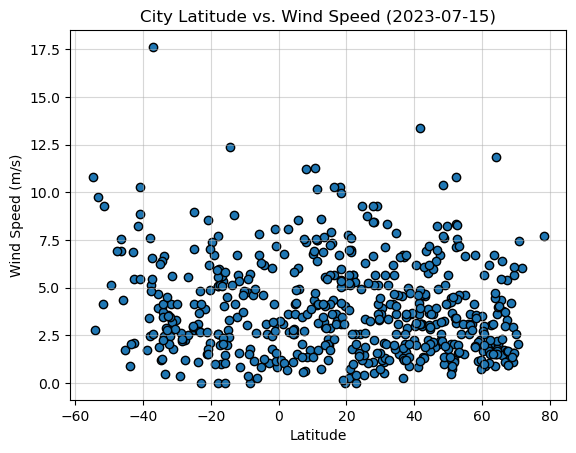

In [39]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots
def linear_regression(dataframe, x, y):
    # Define x and y values based on function inputs
    x_values = dataframe[x]
    y_values = dataframe[y]
    
    # Retrieve date for graph title
    date = dataframe["Date"][0]
    
    # Get label for x-axis
    if x == "Lat":
        x_label = "Latitude"
    elif x == "Lng":
        x_label = "Longitude"
    else:
        x_label = x
        
    # Get label for y-axis
    if y == "Max Temp":
        y_label = y + " (C)"
    elif y == "Humidity" or y == "Cloudiness":
        y_label = y + " (%)"
    elif y == "Wind Speed":
        y_label = y + " (m/s)"
    else:
        y_label = y
    
    # Get linear regression values and line equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Build scatter plot and format graph
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(50,50),xycoords="axes pixels",fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"City {x_label} vs. {y} ({date})")
    plt.grid(alpha=0.5)
    
    # Show graph
    print(f"The r-value is: {rvalue}")
    plt.show()

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].reset_index()

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Dryden,49.7833,-92.7503,17.16,63,100,4.12,CA,2023-07-15
1,2,Arish,31.1316,33.7984,27.24,75,0,2.11,EG,2023-07-15
2,4,Pionerskiy,54.9508,20.2275,20.97,57,98,6.67,RU,2023-07-15
3,5,Stanley,54.8680,-1.6985,14.04,92,75,4.63,GB,2023-07-15
4,6,Ribeira Grande,38.5167,-28.7000,19.87,100,75,0.89,PT,2023-07-15


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].reset_index()

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Puerto Ayora,-0.7393,-90.3518,29.98,92,41,3.13,EC,2023-07-15
1,3,Ushuaia,-54.8000,-68.3000,1.81,69,40,10.80,AR,2023-07-15
2,8,West Island,-12.1568,96.8225,24.99,73,100,6.69,CC,2023-07-15
3,10,Puerto Natales,-51.7236,-72.4875,1.25,75,20,4.12,CL,2023-07-15
4,13,Mareeba,-17.0000,145.4333,17.40,93,79,0.97,AU,2023-07-15


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6308309351921607


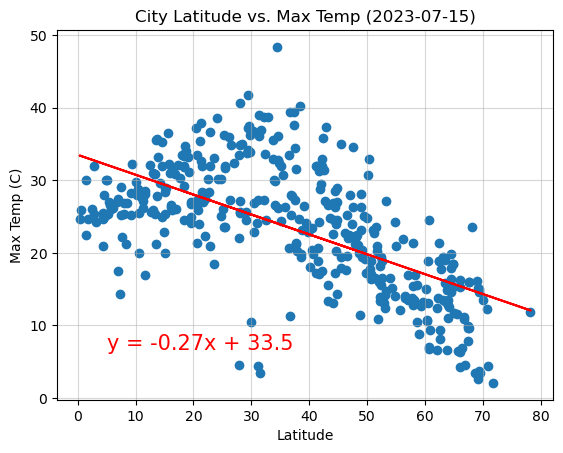

In [86]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.8725415806869167


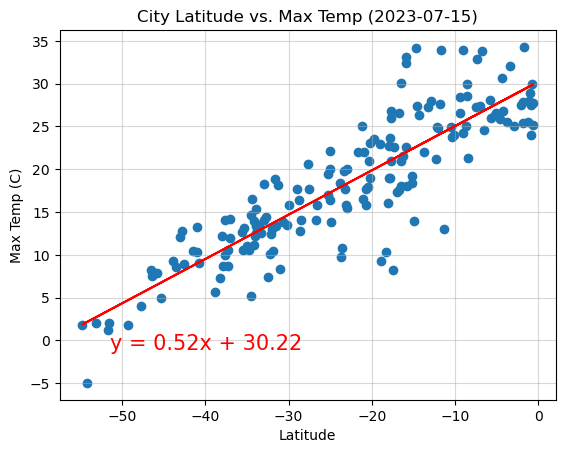

In [87]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** There is a strong correlation between the latitude and max temperature of a city, that is negatively correlated in the northern hemisphere and positively correlated in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03588279248202292


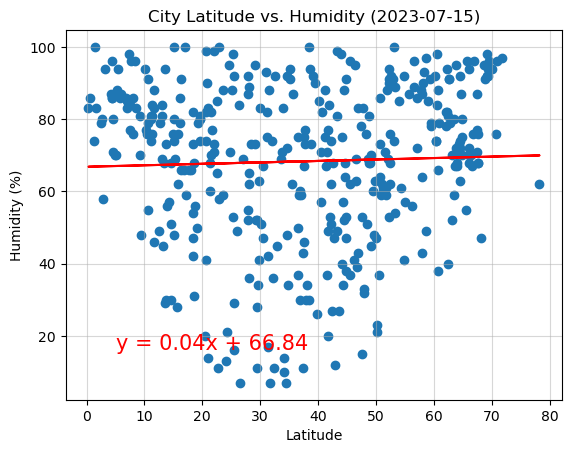

In [88]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity")

The r-value is: -0.013793065490646891


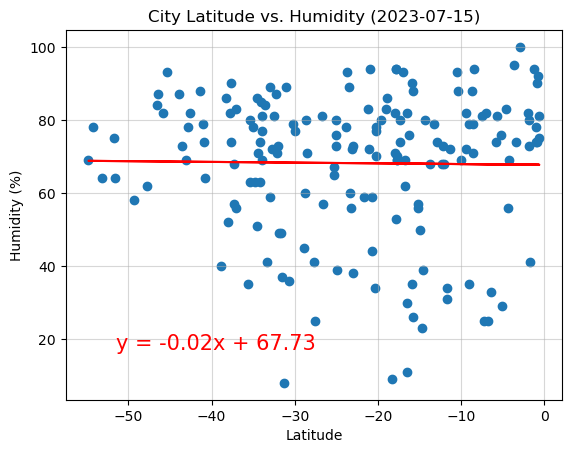

In [89]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** There is no correlation between the latitude of a city and it's humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03218034882193116


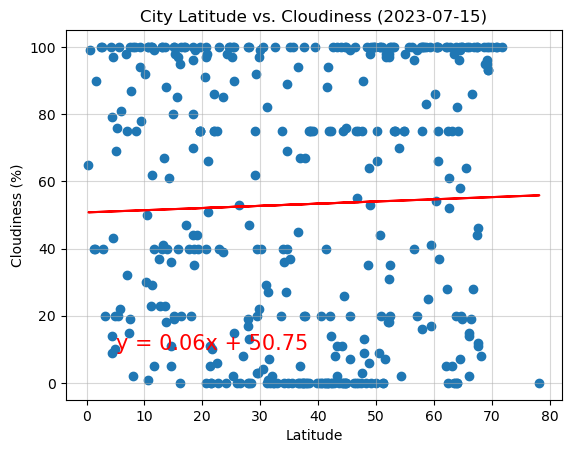

In [90]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: -0.05992456622521664


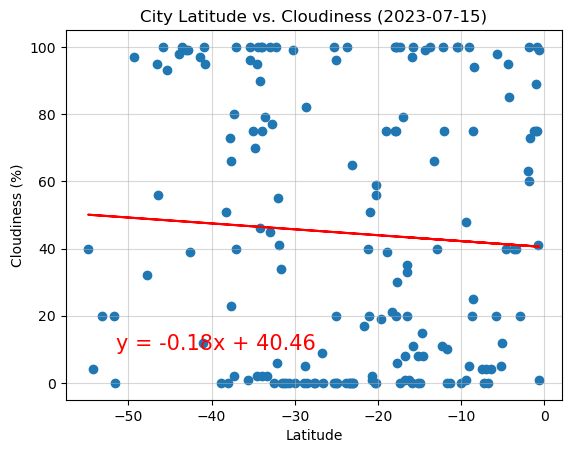

In [91]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** There is no correlation between the latitude of a city and it's cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15779344607963314


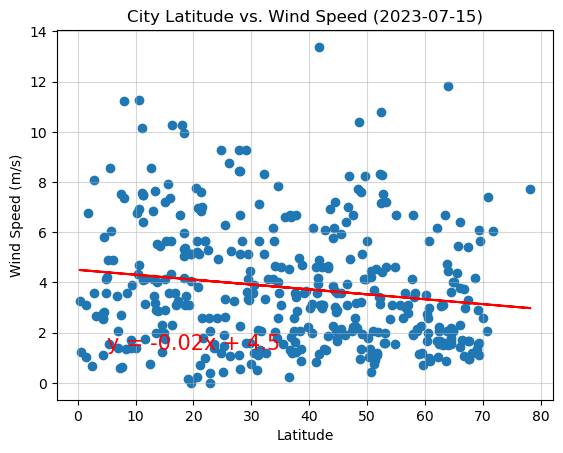

In [92]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.20911692479785454


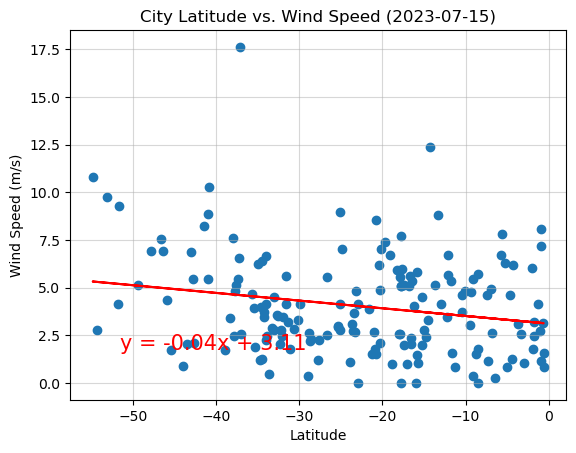

In [93]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** There is a weak negative correlation between the latitude and wind speed of a city.